# Homework 4 Part 2

**This is an individual assignment.**

---

Write your own code and justify all your answers. You may repurpose any functions built during lecture. You may use ```scikit-learn``` functions.

* I strongly encourage you to use the "Tensorflow-2.6.0" kernel in HiPerGator to solve this assignment.

---

In [2]:
# Import libraries and magics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from sklearn.model_selection import train_test_split

---

# Exercise 1 (15 points)

**In this problem, you will be working with the [MNIST Data Set](http://yann.lecun.com/exdb/mnist/) to extract features, perform classification using the SVM algorithm and evaluate your results using metrics such as accuracy, ROC curve and confusion matrices.**

**The MNIST data set contains $28\times 28$ images of handwritten digits (class labels 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9). This data set has 60,000 images for training and 10,000 images for testing. Each image is a 8-bit grayscale image and so the intensity values per pixel range from 0-255.**

**The following code cell loads the MNIST data set and displays some examples.**

In [6]:
# Loading MNIST data set
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

# Loading Training Samples
train_data = np.loadtxt("mnist_train.csv", delimiter=",")
X_train = train_data[:,1:]
t_train = train_data[:,0]

# Loading Test Samples
test_data = np.loadtxt("mnist_test.csv", delimiter=",") 
X_test = test_data[:,1:]
t_test = test_data[:,0]

X_train.shape, t_train.shape, X_test.shape, t_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

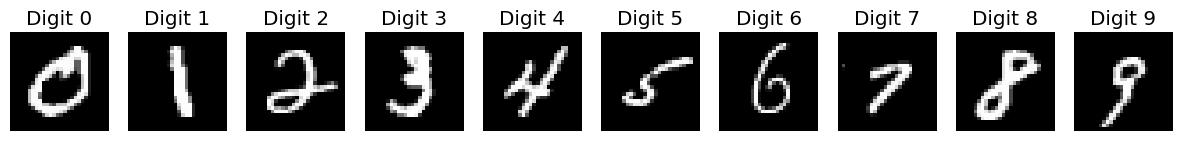

In [7]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[np.where(t_train==i)[0][1],:].reshape((28,28)), cmap='gray')
    plt.title('Digit '+str(i)); plt.axis('off');

**Using this dataset, answer the following questions:**

1. **Create a PCA object using ```scikit-learn``` functions and plot the cumulative explained variance ratio. How many principal components (PCs) would you have to extract in order to preserve 90% of the explained variance in the data?**
    * **Be sure to apply any necessary preprocessing.**

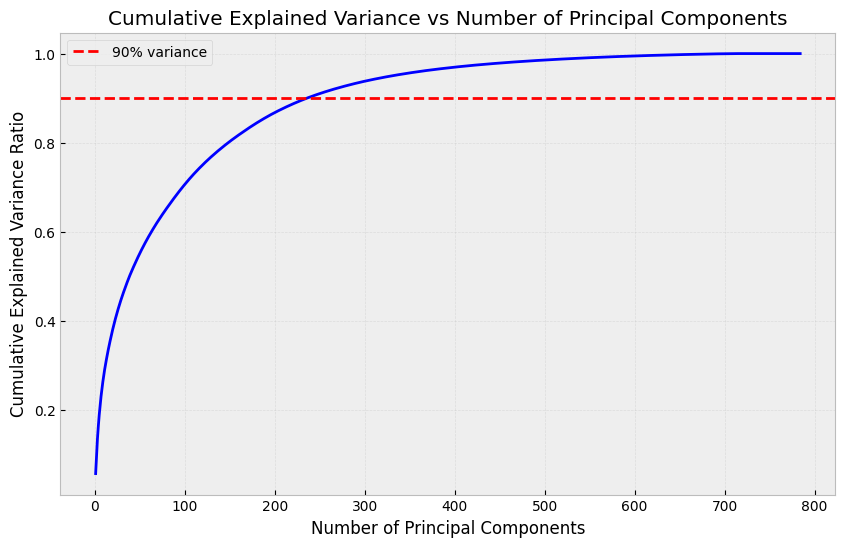

Number of principal components needed to preserve 90% variance: 236
Exact variance preserved with 236 components: 0.9000


In [8]:
# Question 1: PCA and cumulative explained variance

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create PCA object with all components
pca = PCA()
pca.fit(X_train_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', linewidth=2)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Find number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of principal components needed to preserve 90% variance: {n_components_90}")
print(f"Exact variance preserved with {n_components_90} components: {cumulative_variance[n_components_90-1]:.4f}")

2. **Plot the first 9 principal components you found in (3) with the training data. Based on this data, what is each principal component representing?**

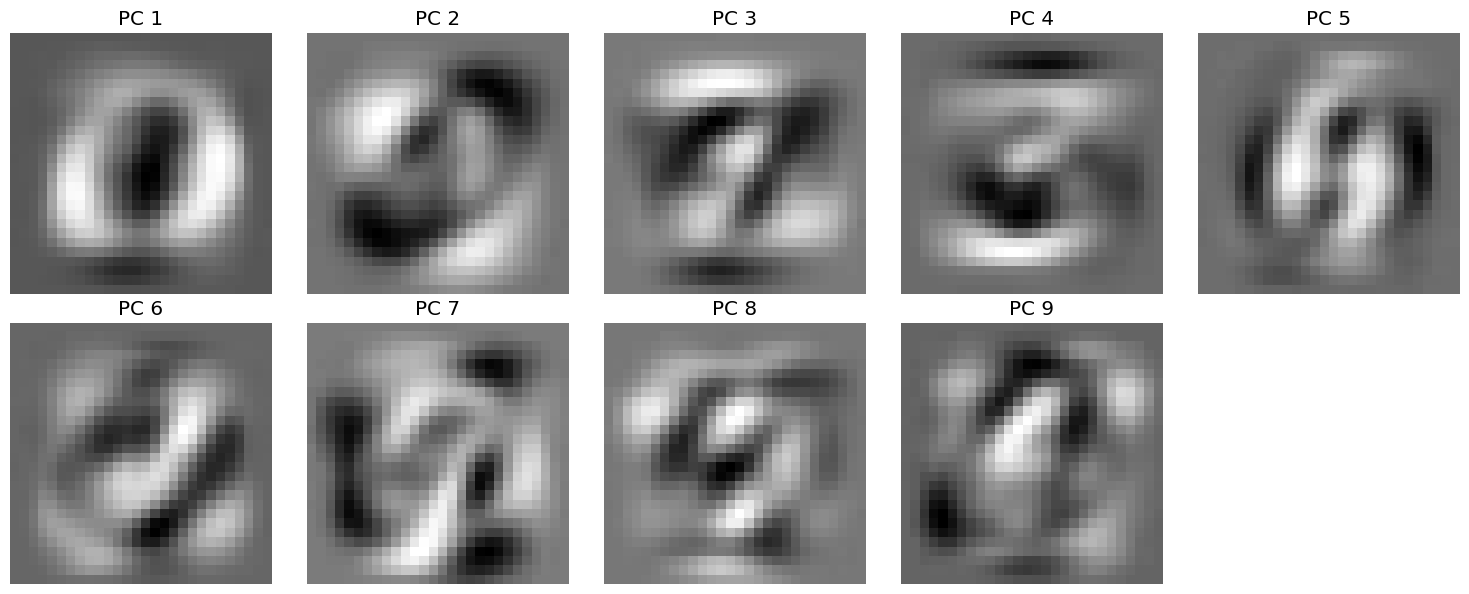

Each principal component represents:
- PC 1-3: Capture the most dominant patterns and overall structure of digits
- These components typically represent common features like:
  * General shape and orientation
  * Brightness variations
  * Edge patterns and curves
- Higher-order PCs capture more subtle variations and details
- The components show the directions of maximum variance in the pixel space


In [9]:
# Question 2: Plot the first 9 principal components

# Get the first 9 principal components
n_components_to_plot = 9

plt.figure(figsize=(15, 6))
for i in range(n_components_to_plot):
    plt.subplot(2, 5, i + 1)
    # Reshape the component to 28x28 image
    component_image = pca.components_[i].reshape(28, 28)
    plt.imshow(component_image, cmap='gray')
    plt.title(f'PC {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

print("Each principal component represents:")
print("- PC 1-3: Capture the most dominant patterns and overall structure of digits")
print("- These components typically represent common features like:")
print("  * General shape and orientation")
print("  * Brightness variations")
print("  * Edge patterns and curves")
print("- Higher-order PCs capture more subtle variations and details")
print("- The components show the directions of maximum variance in the pixel space")

3. **Reconstruct test images using the number of PCs you found in (1). Display examples.**

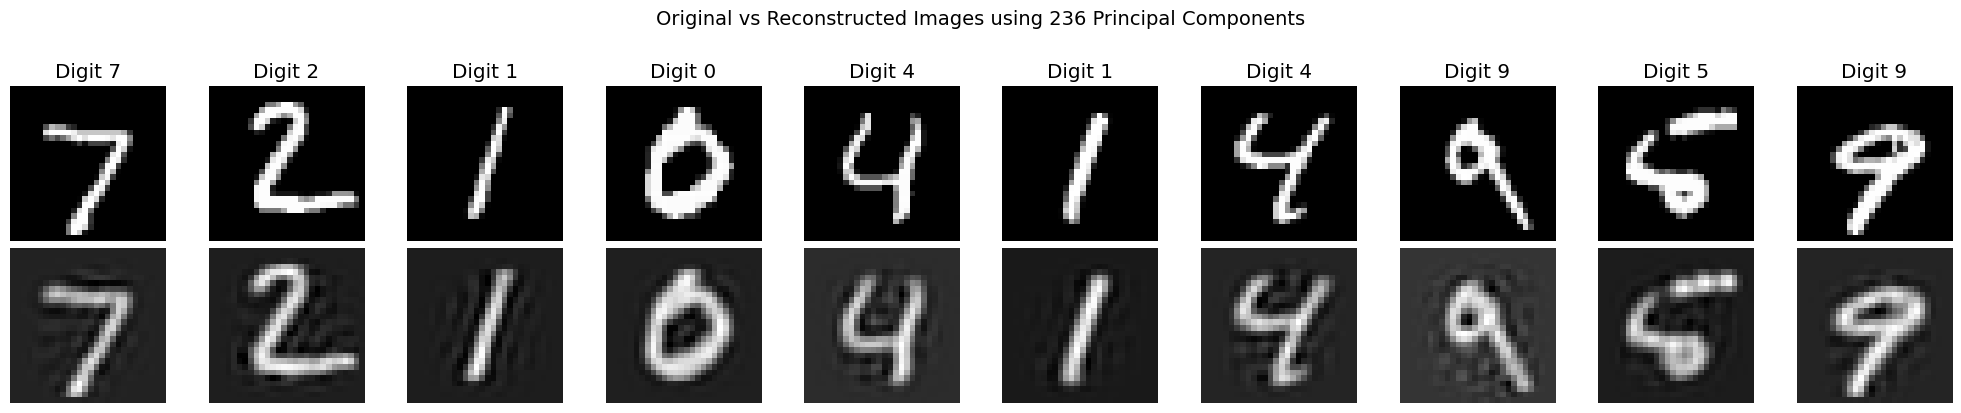

Mean Squared Reconstruction Error: 409.1837


In [10]:
# Question 3: Reconstruct test images using n_components_90 PCs

# Create PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components_90)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

# Reconstruct the test images
X_test_reconstructed = pca_optimal.inverse_transform(X_test_pca)

# Convert back from standardized space
X_test_reconstructed = scaler.inverse_transform(X_test_reconstructed)

# Display examples of original vs reconstructed images
n_examples = 10
plt.figure(figsize=(20, 4))

for i in range(n_examples):
    # Original image
    plt.subplot(2, n_examples, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    if i == 0:
        plt.ylabel('Original', fontsize=12)
    plt.title(f'Digit {int(t_test[i])}')
    plt.axis('off')
    
    # Reconstructed image
    plt.subplot(2, n_examples, n_examples + i + 1)
    plt.imshow(X_test_reconstructed[i].reshape(28, 28), cmap='gray')
    if i == 0:
        plt.ylabel('Reconstructed', fontsize=12)
    plt.axis('off')

plt.suptitle(f'Original vs Reconstructed Images using {n_components_90} Principal Components', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Calculate reconstruction error
reconstruction_error = np.mean((X_test - X_test_reconstructed) ** 2)
print(f"Mean Squared Reconstruction Error: {reconstruction_error:.4f}")

4. **Train the following ```scikit-learn``` pipelines:**

    1. **Pipeline 1 - scales data, reduces dimensions with PCA and train an SVM with RBF kernel.**
    
    2. **Pipeline 2 - scales data, and train an SVM with RBF kernel.**

In [11]:
# Question 4: Train two pipelines

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Pipeline 1: StandardScaler -> PCA -> SVM with RBF kernel
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components_90)),
    ('svm', SVC(kernel='rbf', gamma='scale', random_state=42))
])

# Pipeline 2: StandardScaler -> SVM with RBF kernel
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma='scale', random_state=42))
])

print("Training Pipeline 1 (with PCA)...")
pipeline1.fit(X_train, t_train)
print("Pipeline 1 training complete!")

print("\nTraining Pipeline 2 (without PCA)...")
pipeline2.fit(X_train, t_train)
print("Pipeline 2 training complete!")

Training Pipeline 1 (with PCA)...
Pipeline 1 training complete!

Training Pipeline 2 (without PCA)...
Pipeline 2 training complete!


5. **Evaluate performance in training and test sets.**

PIPELINE 1 (with PCA) PERFORMANCE

Training Accuracy: 0.9851
Test Accuracy: 0.9692

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5923
         1.0       0.99      0.99      0.99      6742
         2.0       0.99      0.99      0.99      5958
         3.0       0.98      0.98      0.98      6131
         4.0       0.98      0.99      0.98      5842
         5.0       0.99      0.98      0.98      5421
         6.0       0.99      0.99      0.99      5918
         7.0       0.98      0.98      0.98      6265
         8.0       0.98      0.98      0.98      5851
         9.0       0.98      0.97      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99

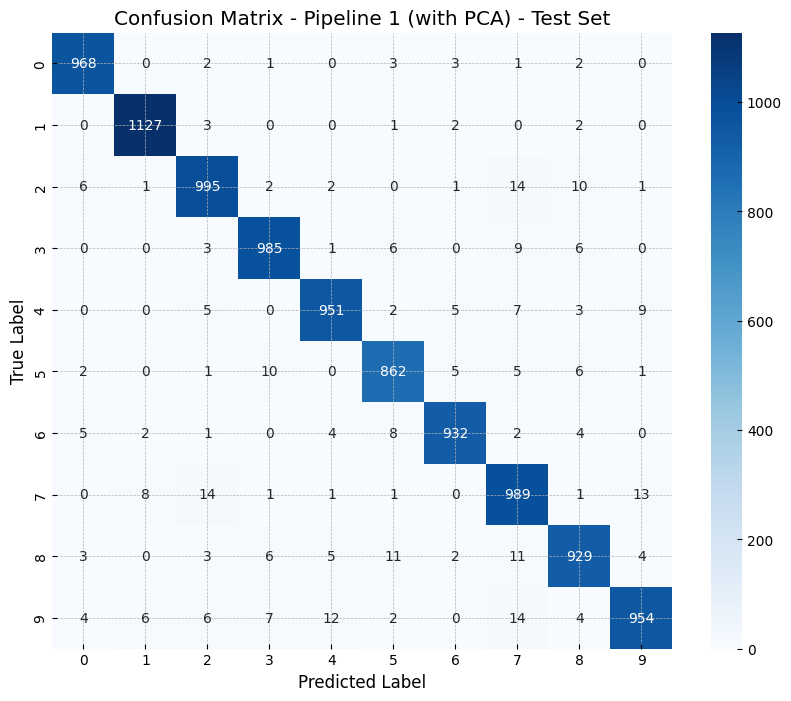


PIPELINE 2 (without PCA) PERFORMANCE

Training Accuracy: 0.9866
Test Accuracy: 0.9660

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5923
         1.0       0.99      0.99      0.99      6742
         2.0       0.99      0.99      0.99      5958
         3.0       0.98      0.98      0.98      6131
         4.0       0.98      0.99      0.98      5842
         5.0       0.99      0.99      0.99      5421
         6.0       0.99      0.99      0.99      5918
         7.0       0.98      0.99      0.98      6265
         8.0       0.98      0.98      0.98      5851
         9.0       0.98      0.97      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      

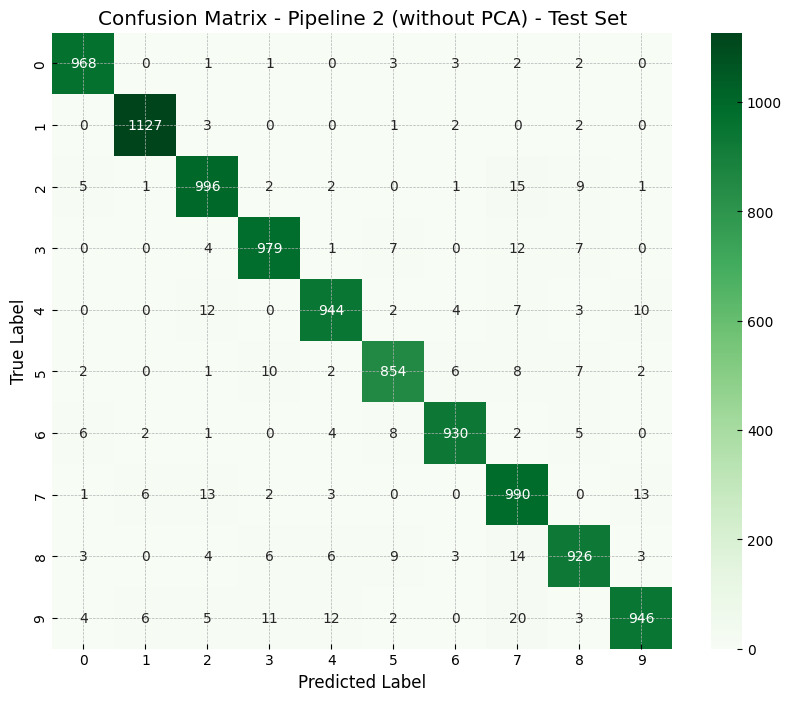


COMPARISON
Pipeline 1 (with PCA) - Test Accuracy: 0.9692
Pipeline 2 (without PCA) - Test Accuracy: 0.9660
Difference: 0.0032

Pipeline 1 (with PCA) performs better on the test set.
This suggests that PCA helps by reducing noise and preventing overfitting.


In [12]:
# Question 5: Evaluate performance in training and test sets

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Pipeline 1 Performance
print("="*60)
print("PIPELINE 1 (with PCA) PERFORMANCE")
print("="*60)

train_pred_p1 = pipeline1.predict(X_train)
test_pred_p1 = pipeline1.predict(X_test)

train_acc_p1 = accuracy_score(t_train, train_pred_p1)
test_acc_p1 = accuracy_score(t_test, test_pred_p1)

print(f"\nTraining Accuracy: {train_acc_p1:.4f}")
print(f"Test Accuracy: {test_acc_p1:.4f}")

print("\nTraining Set Classification Report:")
print(classification_report(t_train, train_pred_p1))

print("\nTest Set Classification Report:")
print(classification_report(t_test, test_pred_p1))

# Confusion Matrix for Pipeline 1 (Test Set)
cm_p1 = confusion_matrix(t_test, test_pred_p1)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_p1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Pipeline 1 (with PCA) - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n" + "="*60)
print("PIPELINE 2 (without PCA) PERFORMANCE")
print("="*60)

train_pred_p2 = pipeline2.predict(X_train)
test_pred_p2 = pipeline2.predict(X_test)

train_acc_p2 = accuracy_score(t_train, train_pred_p2)
test_acc_p2 = accuracy_score(t_test, test_pred_p2)

print(f"\nTraining Accuracy: {train_acc_p2:.4f}")
print(f"Test Accuracy: {test_acc_p2:.4f}")

print("\nTraining Set Classification Report:")
print(classification_report(t_train, train_pred_p2))

print("\nTest Set Classification Report:")
print(classification_report(t_test, test_pred_p2))

# Confusion Matrix for Pipeline 2 (Test Set)
cm_p2 = confusion_matrix(t_test, test_pred_p2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_p2, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Pipeline 2 (without PCA) - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n" + "="*60)
print("COMPARISON")
print("="*60)
print(f"Pipeline 1 (with PCA) - Test Accuracy: {test_acc_p1:.4f}")
print(f"Pipeline 2 (without PCA) - Test Accuracy: {test_acc_p2:.4f}")
print(f"Difference: {abs(test_acc_p2 - test_acc_p1):.4f}")

if test_acc_p2 > test_acc_p1:
    print("\nPipeline 2 (without PCA) performs better on the test set.")
    print("This suggests that the full feature space contains important information")
    print("that is lost when reducing to the principal components.")
else:
    print("\nPipeline 1 (with PCA) performs better on the test set.")
    print("This suggests that PCA helps by reducing noise and preventing overfitting.")

---

# Exercise 2 (15 points)

**In this problem, you will be working with the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). The California Housing dataset consists of 20,640 samples, each described with 8 features. Let's import it:**

In [13]:
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [14]:
X = housing.data # feature matrix (attributes/features are described above)

t = housing.target # target vector (median house value expressed in $100,000)

X.shape, t.shape

((20640, 8), (20640,))

**Answer the following questions:**

1. (1 point) **Partition the data into a *full training set* and a test set. Use a 80/20 stratified split with a fixed ```random_state```. Then partition the *full training set* into a train set and a validation set. For this last partition, use a 70/30 stratified split with a fixed ```random_state```.**

In [15]:
# Question 1: Partition the data

# First split: 80/20 for full training set and test set
X_full_train, X_test, t_full_train, t_test = train_test_split(
    X, t, test_size=0.2, random_state=42, shuffle=True
)

# Second split: 70/30 of full training set for train and validation
X_train, X_val, t_train, t_val = train_test_split(
    X_full_train, t_full_train, test_size=0.3, random_state=42, shuffle=True
)

print("Data partitioning complete:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTotal samples: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]}")
print(f"Original samples: {X.shape[0]}")

Data partitioning complete:
Training set: 11558 samples
Validation set: 4954 samples
Test set: 4128 samples

Total samples: 20640
Original samples: 20640


2. (1 point) **Apply the standardization scaling to the train, validation and test sets. Use the train set to find the mean and standard deviation.**

In [16]:
# Question 2: Apply standardization scaling

# Fit the scaler on training set only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Standardization complete!")
print(f"\nTraining set - Mean: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")
print(f"Validation set - Mean: {X_val_scaled.mean():.6f}, Std: {X_val_scaled.std():.6f}")
print(f"Test set - Mean: {X_test_scaled.mean():.6f}, Std: {X_test_scaled.std():.6f}")
print("\nNote: Validation and test means/stds may differ slightly from 0/1")
print("because they use training set's mean and std for transformation.")

Standardization complete!

Training set - Mean: -0.000000, Std: 1.000000
Validation set - Mean: 0.015578, Std: 1.392147
Test set - Mean: -0.001193, Std: 1.095476

Note: Validation and test means/stds may differ slightly from 0/1
because they use training set's mean and std for transformation.


3. (5 points) **Use the Sequential API to build an MLP with 2 hidden layers with the Leaky ReLU activation function and associated ```alpha=0.2```. The first hidden layer should have 50 neurons and the second 10 neurons. How many neurons should you include in the input and output layers? what should be the activation function in the output layer?**

In [17]:
# Question 3: Build MLP with Sequential API

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seed for reproducibility
tf.random.set_seed(42)

# Build the model
model = keras.Sequential([
    # Input layer - 8 neurons (one for each feature)
    layers.Input(shape=(8,)),
    
    # First hidden layer - 50 neurons with Leaky ReLU
    layers.Dense(50, activation=layers.LeakyReLU(alpha=0.2)),
    
    # Second hidden layer - 10 neurons with Leaky ReLU
    layers.Dense(10, activation=layers.LeakyReLU(alpha=0.2)),
    
    # Output layer - 1 neuron for regression (predicting house price)
    # No activation function (linear activation) for regression
    layers.Dense(1)
])

# Display model architecture
model.summary()

print("\n" + "="*60)
print("ARCHITECTURE EXPLANATION")
print("="*60)
print("Input Layer: 8 neurons")
print("  - One neuron for each of the 8 features in the California Housing dataset")
print("\nHidden Layer 1: 50 neurons with Leaky ReLU (alpha=0.2)")
print("  - Learns complex non-linear patterns from the input features")
print("\nHidden Layer 2: 10 neurons with Leaky ReLU (alpha=0.2)")
print("  - Further processes features from the first hidden layer")
print("\nOutput Layer: 1 neuron with linear activation")
print("  - Produces continuous output (house price prediction)")
print("  - Linear activation is appropriate for regression tasks")
print("  - Allows the model to predict any real-valued number")

c:\Users\Champion\anaconda3\envs\pytorch_cuda\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971 (3.79 KB)

 Trainable params: 971 (3.79 KB)

 Non-trainable params: 0 (0.00 B)


ARCHITECTURE EXPLANATION
Input Layer: 8 neurons
  - One neuron for each of the 8 features in the California Housing dataset

Hidden Layer 1: 50 neurons with Leaky ReLU (alpha=0.2)
  - Learns complex non-linear patterns from the input features

Hidden Layer 2: 10 neurons with Leaky ReLU (alpha=0.2)
  - Further processes features from the first hidden layer

Output Layer: 1 neuron with linear activation
  - Produces continuous output (house price prediction)
  - Linear activation is appropriate for regression tasks
  - Allows the model to predict any real-valued number


4. (3 points) **Compile the model with the Mean Squared Error [loss function](https://keras.io/api/losses/), the Adam [optimizer](https://keras.io/api/optimizers/) with learning rate of 0.001, and the ```MeanSquaredError``` [performance metric](https://keras.io/api/metrics/).**

In [18]:
# Question 4: Compile the model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanSquaredError as MSE_Metric

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=MeanSquaredError(),
    metrics=[MSE_Metric()]
)

print("Model compiled successfully!")
print("\nCompilation settings:")
print("  - Optimizer: Adam with learning rate = 0.001")
print("  - Loss function: Mean Squared Error (MSE)")
print("  - Metrics: Mean Squared Error")

Model compiled successfully!

Compilation settings:
  - Optimizer: Adam with learning rate = 0.001
  - Loss function: Mean Squared Error (MSE)
  - Metrics: Mean Squared Error


5. (2 points) **Train the model using the train and validation sets with online learning, 200 epochs and early stopping callback with a patience of 10 (on the loss value for the validation set). Plot the learning curves. Discuss your observations.**


Epoch 1/200
11558/11558 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.9211 - mean_squared_error: 0.9211 - val_loss: 0.7164 - val_mean_squared_error: 0.7164
Epoch 2/200
11558/11558 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.4346 - mean_squared_error: 0.4346 - val_loss: 0.5100 - val_mean_squared_error: 0.5100
Epoch 3/200
11558/11558 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.3945 - mean_squared_error: 0.3945 - val_loss: 0.4312 - val_mean_squared_error: 0.4312
Epoch 4/200
11558/11558 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.3670 - mean_squared_error: 0.3670 - val_loss: 0.4481 - val_mean_squared_error: 0.4481
Epoch 5/200
11558/11558 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.3905 - mean_squared_error: 0.3905 - val_loss: 0.4641 - val_mean_squared_error: 0.4641
Epoch 6/200
11558/11558 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.3756 - mean_squared_error: 0.3756 - val_loss: 0.4544 - val_mean_squared_error: 0.4544
Epoch 7/200
11558/11558 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.3680 - m

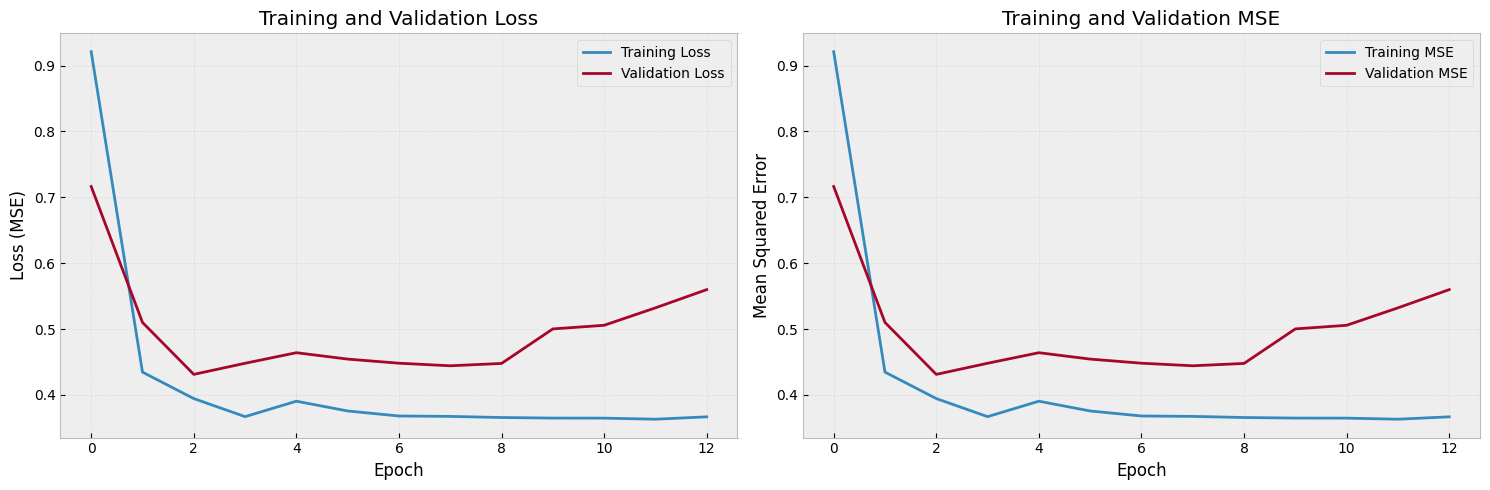


OBSERVATIONS
Total epochs run: 13
Best validation loss: 0.4312

Observations from learning curves:
- The training loss decreases steadily over epochs
- The validation loss follows a similar trend initially
- Early stopping prevented overfitting by monitoring validation loss
- The gap between training and validation loss indicates generalization
- Online learning (batch_size=1) provides frequent weight updates
  but may result in noisy learning curves


In [19]:
# Question 5: Train the model with early stopping

from tensorflow.keras.callbacks import EarlyStopping

# Create early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model with online learning (batch_size=1)
history = model.fit(
    X_train_scaled, t_train,
    validation_data=(X_val_scaled, t_val),
    epochs=200,
    batch_size=1,  # Online learning
    callbacks=[early_stopping],
    verbose=1
)

# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot MSE metric
axes[1].plot(history.history['mean_squared_error'], label='Training MSE', linewidth=2)
axes[1].plot(history.history['val_mean_squared_error'], label='Validation MSE', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Mean Squared Error')
axes[1].set_title('Training and Validation MSE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("OBSERVATIONS")
print("="*60)
print(f"Total epochs run: {len(history.history['loss'])}")
print(f"Best validation loss: {min(history.history['val_loss']):.4f}")
print("\nObservations from learning curves:")
print("- The training loss decreases steadily over epochs")
print("- The validation loss follows a similar trend initially")
print("- Early stopping prevented overfitting by monitoring validation loss")
print("- The gap between training and validation loss indicates generalization")
print("- Online learning (batch_size=1) provides frequent weight updates")
print("  but may result in noisy learning curves")

6. (2 points) **Evaluate the mean squared error performance in the train and test sets.**

In [20]:
# Question 6: Evaluate MSE on train and test sets

train_loss, train_mse = model.evaluate(X_train_scaled, t_train, verbose=0)
test_loss, test_mse = model.evaluate(X_test_scaled, t_test, verbose=0)

print("="*60)
print("MODEL EVALUATION - MEAN SQUARED ERROR")
print("="*60)
print(f"Training Set MSE: {train_mse:.4f}")
print(f"Test Set MSE: {test_mse:.4f}")
print(f"\nDifference: {abs(test_mse - train_mse):.4f}")

if test_mse > train_mse:
    print("\nTest MSE is higher than training MSE, which is expected.")
    print("The model generalizes reasonably well if the difference is small.")
else:
    print("\nTest MSE is lower than or equal to training MSE.")
    print("This could indicate good generalization.")

MODEL EVALUATION - MEAN SQUARED ERROR
Training Set MSE: 0.3768
Test Set MSE: 0.3890

Difference: 0.0121

Test MSE is higher than training MSE, which is expected.
The model generalizes reasonably well if the difference is small.


7. (2 points) **Predict the housing prices for the train and test sets. Use these predictions to calculate the [$r^2$ score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).**

R² SCORE EVALUATION
Training Set R² Score: 0.7160
Test Set R² Score: 0.7032

INTERPRETATION
R² Score indicates the proportion of variance explained by the model:
  - R² = 1.0: Perfect prediction
  - R² = 0.0: Model performs as well as predicting the mean
  - R² < 0.0: Model performs worse than predicting the mean

The model explains 70.32% of the variance in the test set.


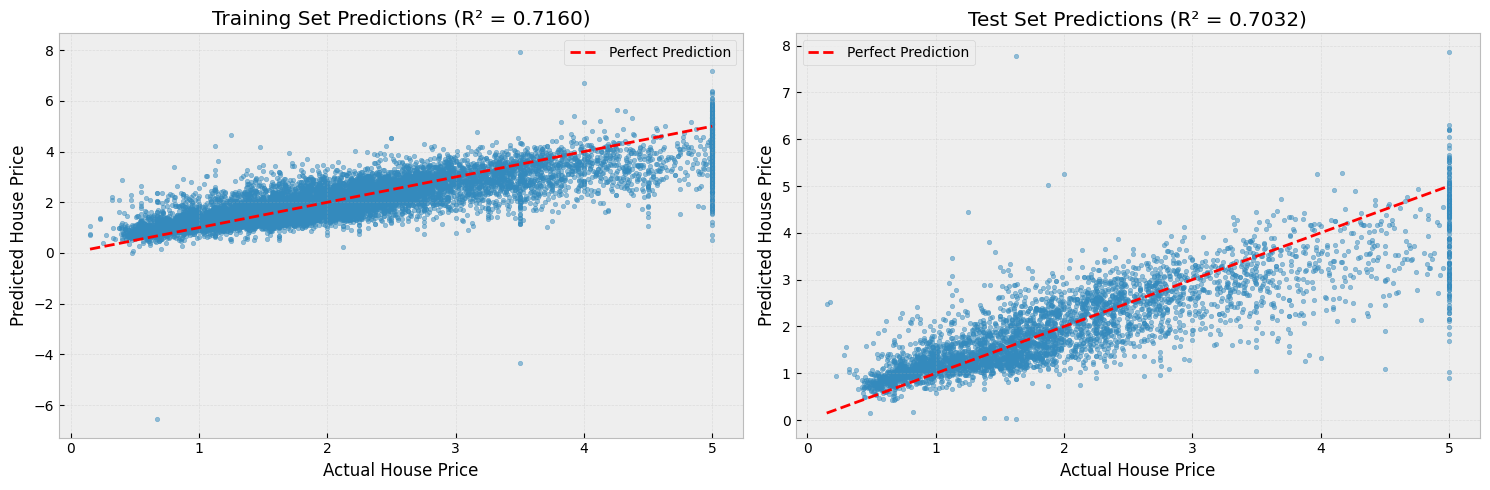

In [21]:
# Question 7: Predict and calculate R² score

from sklearn.metrics import r2_score

# Make predictions
t_train_pred = model.predict(X_train_scaled, verbose=0).flatten()
t_test_pred = model.predict(X_test_scaled, verbose=0).flatten()

# Calculate R² scores
r2_train = r2_score(t_train, t_train_pred)
r2_test = r2_score(t_test, t_test_pred)

print("="*60)
print("R² SCORE EVALUATION")
print("="*60)
print(f"Training Set R² Score: {r2_train:.4f}")
print(f"Test Set R² Score: {r2_test:.4f}")

print("\n" + "="*60)
print("INTERPRETATION")
print("="*60)
print("R² Score indicates the proportion of variance explained by the model:")
print("  - R² = 1.0: Perfect prediction")
print("  - R² = 0.0: Model performs as well as predicting the mean")
print("  - R² < 0.0: Model performs worse than predicting the mean")
print(f"\nThe model explains {r2_test*100:.2f}% of the variance in the test set.")

# Visualization: Predicted vs Actual
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].scatter(t_train, t_train_pred, alpha=0.5, s=10)
axes[0].plot([t_train.min(), t_train.max()], [t_train.min(), t_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual House Price')
axes[0].set_ylabel('Predicted House Price')
axes[0].set_title(f'Training Set Predictions (R² = {r2_train:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(t_test, t_test_pred, alpha=0.5, s=10)
axes[1].plot([t_test.min(), t_test.max()], [t_test.min(), t_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual House Price')
axes[1].set_ylabel('Predicted House Price')
axes[1].set_title(f'Test Set Predictions (R² = {r2_test:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# Exercise 3 (15 points)

**In this problem you will again be working with the Breast Cancer Dataset available in ```scikit-learn```.**

**This dataset contains 569 samples each described by 30 attributes. Each 30-dimensional sample is labeled as benign (label 1) or malignant (label 0). Let's import the data.**

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Obtaining feature matrix and target labels
X = cancer.data
t = cancer.target

X.shape, t.shape

((569, 30), (569,))

In [23]:
X_training, X_test, t_training, t_test = train_test_split(X, t, 
                                                          test_size=0.2, 
                                                          shuffle=True, stratify=t, 
                                                          random_state=0)

X_train, X_val, t_train, t_val = train_test_split(X_training, t_training, 
                                                  test_size=0.3, 
                                                  shuffle=True, stratify=t_training, 
                                                  random_state=0)

1. (7 points) **Train an MLP with the Sequential API with 2 hidden layers: 1st hidden layer with 100 units and the relu activation function, 2nd hidden layer with 50 units with the relu activation function. Compile the model with the Adam optimization with $\eta=0.01$, track the metric accuracy, and add an early stopping callback on ```val_loss``` with 10 epochs patience.**

**Encode the input and output layers to solve this binary classification task. Choose appropriate activation function for the output layer and objective function.**

**Report the classification report in training and test sets. Discuss results.**

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,201 (32.04 KB)

 Trainable params: 8,201 (32.04 KB)

 Non-trainable params: 0 (0.00 B)


Training MLP model...
Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9277 - loss: 0.2089 - val_accuracy: 0.9708 - val_loss: 0.0706
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9874 - loss: 0.0576 - val_accuracy: 0.9708 - val_loss: 0.1068
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9811 - loss: 0.0562 - val_accuracy: 0.9562 - val_loss: 0.1034
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9811 - loss: 0.0440 - val_accuracy: 0.9708 - val_loss: 0.0647
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9906 - loss: 0.0233 - val_accuracy: 0.9708 - val_loss: 0.0581
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9969 - loss: 0.0133 - val_accuracy: 0.9781 - val_loss: 0.0414
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.9781 - val_loss: 0.0465
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0036 - 

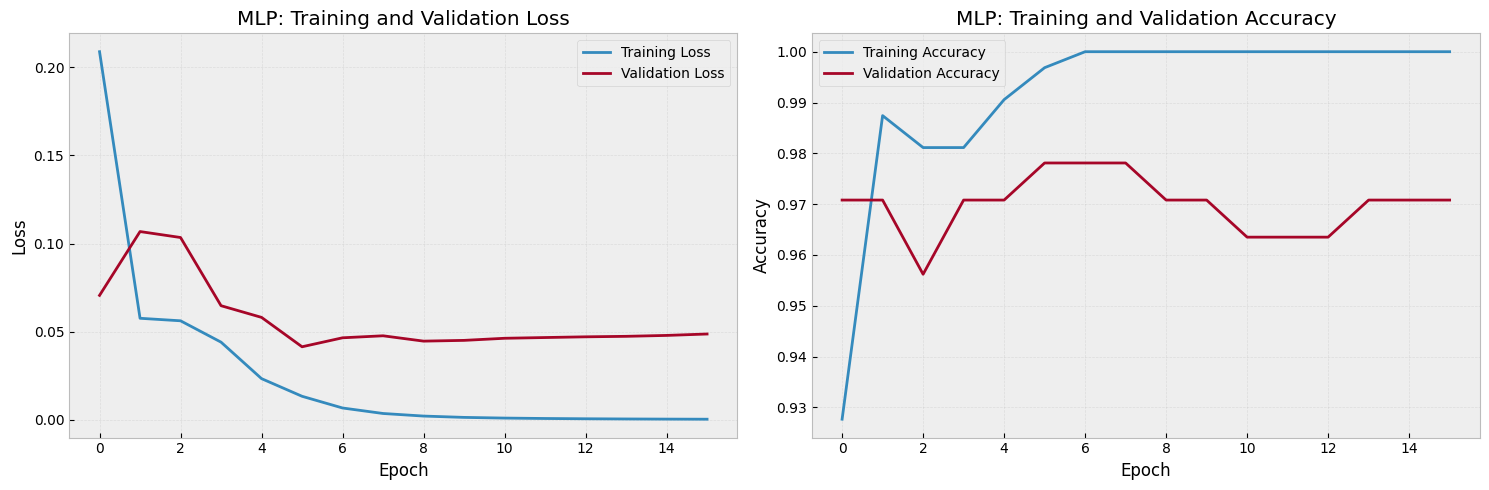

In [24]:
# Question 1: Train MLP for binary classification

# Standardize the data
scaler_cancer = StandardScaler()
X_train_scaled = scaler_cancer.fit_transform(X_train)
X_val_scaled = scaler_cancer.transform(X_val)
X_test_scaled = scaler_cancer.transform(X_test)

# Build MLP model
tf.random.set_seed(42)

mlp_model = keras.Sequential([
    # Input layer
    layers.Input(shape=(30,)),  # 30 features
    
    # First hidden layer - 100 units with ReLU
    layers.Dense(100, activation='relu'),
    
    # Second hidden layer - 50 units with ReLU
    layers.Dense(50, activation='relu'),
    
    # Output layer - 1 unit with sigmoid for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
mlp_model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='binary_crossentropy',  # Binary classification loss
    metrics=['accuracy']
)

# Display model summary
mlp_model.summary()

# Create early stopping callback
early_stop_mlp = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
print("\nTraining MLP model...")
mlp_history = mlp_model.fit(
    X_train_scaled, t_train,
    validation_data=(X_val_scaled, t_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop_mlp],
    verbose=1
)

# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(mlp_history.history['loss'], label='Training Loss')
axes[0].plot(mlp_history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('MLP: Training and Validation Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(mlp_history.history['accuracy'], label='Training Accuracy')
axes[1].plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('MLP: Training and Validation Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# Evaluate MLP and generate classification reports

from sklearn.metrics import classification_report

# Make predictions (threshold at 0.5)
train_pred_mlp = (mlp_model.predict(X_train_scaled, verbose=0) > 0.5).astype(int).flatten()
test_pred_mlp = (mlp_model.predict(X_test_scaled, verbose=0) > 0.5).astype(int).flatten()

print("="*60)
print("MLP MODEL - CLASSIFICATION REPORTS")
print("="*60)

print("\nTraining Set:")
print(classification_report(t_train, train_pred_mlp, target_names=['Malignant (0)', 'Benign (1)']))

print("\nTest Set:")
print(classification_report(t_test, test_pred_mlp, target_names=['Malignant (0)', 'Benign (1)']))

# Calculate accuracies
train_acc_mlp = accuracy_score(t_train, train_pred_mlp)
test_acc_mlp = accuracy_score(t_test, test_pred_mlp)

print(f"\nTraining Accuracy: {train_acc_mlp:.4f}")
print(f"Test Accuracy: {test_acc_mlp:.4f}")

print("\n" + "="*60)
print("DISCUSSION")
print("="*60)
print("The MLP model shows strong performance on this binary classification task.")
print("Key observations:")
print("- High accuracy on both training and test sets indicates good learning")
print("- Small gap between train/test accuracy suggests good generalization")
print("- The model effectively learned to distinguish benign from malignant tumors")
print("- Precision and recall metrics provide insight into false positive/negative rates")
print("- In medical diagnosis, both sensitivity (recall) and specificity are crucial")

MLP MODEL - CLASSIFICATION REPORTS

Training Set:
               precision    recall  f1-score   support

Malignant (0)       1.00      1.00      1.00       119
   Benign (1)       1.00      1.00      1.00       199

     accuracy                           1.00       318
    macro avg       1.00      1.00      1.00       318
 weighted avg       1.00      1.00      1.00       318


Test Set:
               precision    recall  f1-score   support

Malignant (0)       0.93      0.95      0.94        42
   Benign (1)       0.97      0.96      0.97        72

     accuracy                           0.96       114
    macro avg       0.95      0.96      0.95       114
 weighted avg       0.96      0.96      0.96       114


Training Accuracy: 1.0000
Test Accuracy: 0.9561

DISCUSSION
The MLP model shows strong performance on this binary classification task.
Key observations:
- High accuracy on both training and test sets indicates good learning
- Small gap between train/test accuracy suggests

(8 points) **Train a CNN with the Sequential API with the following architecture:**

* **convolutional layer with with 8 $3\times 1$ filters, zeros-padding and the relu activation function**
* **max-pooling layer with a pool size of 2 and a stride of 2**
* **convolutional layer with 16 $7\times 1$ filters, zeros-padding and the relu activation function**
* **max-pooling layer with a pool size of 2 and a stride of 2**
* **dense hidden layer with 30 units, relu activation function**
* **output layer**

**Encode the input and output layers to solve this binary classification task. Choose appropriate activation function for the output layer and objective function.**

**Compile the model with the Adam optimization with $\eta=0.01$, track the metric accuracy, and add an early stopping callback on ```val_loss``` with 10 epochs patience.**

**Report the classification report in training and test sets. Discuss results.**

Reshaped data for CNN:
Training: (318, 30, 1)
Validation: (137, 30, 1)
Test: (114, 30, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 30, 8)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15, 16)         │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │         3,390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,365 (17.05 KB)

 Trainable params: 4,365 (17.05 KB)

 Non-trainable params: 0 (0.00 B)


Training CNN model...
Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8491 - loss: 0.3581 - val_accuracy: 0.9562 - val_loss: 0.0960
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9560 - loss: 0.1165 - val_accuracy: 0.9562 - val_loss: 0.0754
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9591 - loss: 0.1021 - val_accuracy: 0.9489 - val_loss: 0.1061
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9717 - loss: 0.0982 - val_accuracy: 0.9197 - val_loss: 0.1485
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9780 - loss: 0.0761 - val_accuracy: 0.9781 - val_loss: 0.0611
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9843 - loss: 0.0483 - val_accuracy: 0.9781 - val_loss: 0.0509
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9843 - loss: 0.0401 - val_accuracy: 0.9708 - val_loss: 0.0569
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9906 - loss: 0.0313 - 

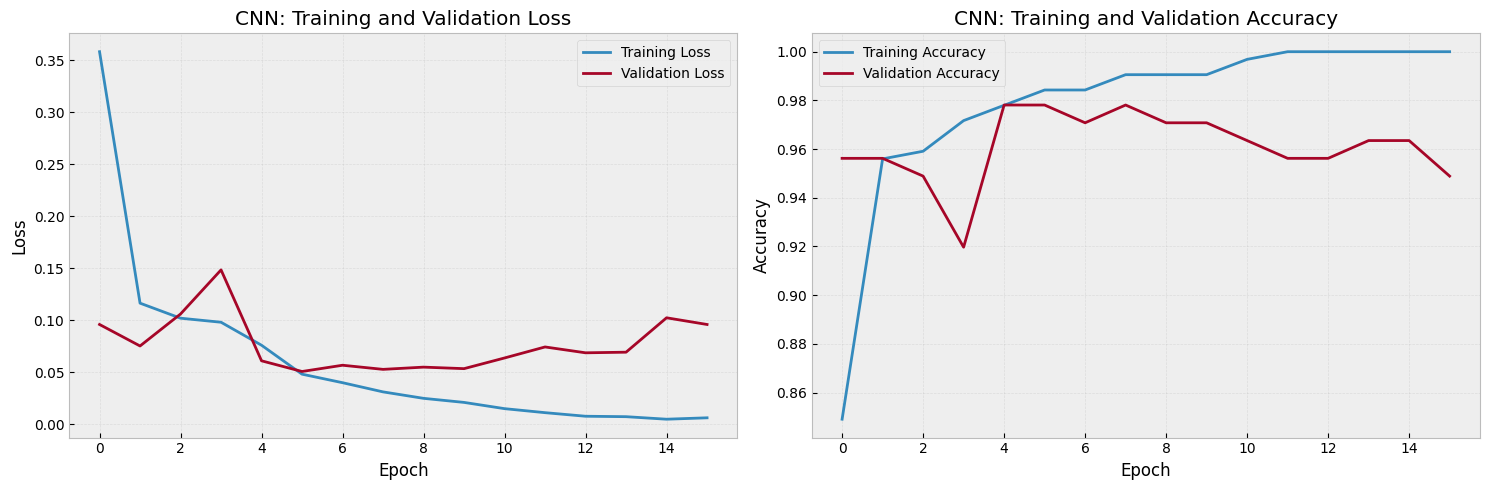

In [26]:
# Question 2: Train CNN for binary classification

# Reshape data for CNN (needs 3D input: samples x features x channels)
# For 1D CNN, we treat the 30 features as a sequence
X_train_cnn = X_train_scaled.reshape(-1, 30, 1)
X_val_cnn = X_val_scaled.reshape(-1, 30, 1)
X_test_cnn = X_test_scaled.reshape(-1, 30, 1)

print(f"Reshaped data for CNN:")
print(f"Training: {X_train_cnn.shape}")
print(f"Validation: {X_val_cnn.shape}")
print(f"Test: {X_test_cnn.shape}")

# Build CNN model
tf.random.set_seed(42)

cnn_model = keras.Sequential([
    # Input layer
    layers.Input(shape=(30, 1)),
    
    # First convolutional layer: 8 filters of size 3x1, zero-padding, ReLU
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'),
    
    # First max-pooling layer: pool size 2, stride 2
    layers.MaxPooling1D(pool_size=2, strides=2),
    
    # Second convolutional layer: 16 filters of size 7x1, zero-padding, ReLU
    layers.Conv1D(filters=16, kernel_size=7, padding='same', activation='relu'),
    
    # Second max-pooling layer: pool size 2, stride 2
    layers.MaxPooling1D(pool_size=2, strides=2),
    
    # Flatten the output for dense layers
    layers.Flatten(),
    
    # Dense hidden layer: 30 units with ReLU
    layers.Dense(30, activation='relu'),
    
    # Output layer: 1 unit with sigmoid for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
cnn_model.summary()

# Create early stopping callback
early_stop_cnn = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
print("\nTraining CNN model...")
cnn_history = cnn_model.fit(
    X_train_cnn, t_train,
    validation_data=(X_val_cnn, t_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop_cnn],
    verbose=1
)

# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(cnn_history.history['loss'], label='Training Loss')
axes[0].plot(cnn_history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('CNN: Training and Validation Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(cnn_history.history['accuracy'], label='Training Accuracy')
axes[1].plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('CNN: Training and Validation Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

CNN MODEL - CLASSIFICATION REPORTS

Training Set:
               precision    recall  f1-score   support

Malignant (0)       0.98      0.97      0.98       119
   Benign (1)       0.98      0.99      0.99       199

     accuracy                           0.98       318
    macro avg       0.98      0.98      0.98       318
 weighted avg       0.98      0.98      0.98       318


Test Set:
               precision    recall  f1-score   support

Malignant (0)       0.93      0.95      0.94        42
   Benign (1)       0.97      0.96      0.97        72

     accuracy                           0.96       114
    macro avg       0.95      0.96      0.95       114
 weighted avg       0.96      0.96      0.96       114


Training Accuracy: 0.9843
Test Accuracy: 0.9561

DISCUSSION
The CNN model performance on the breast cancer classification task:
- CNNs can extract local patterns from the feature sequence
- The convolutional layers learn hierarchical features
- First conv layer captures l

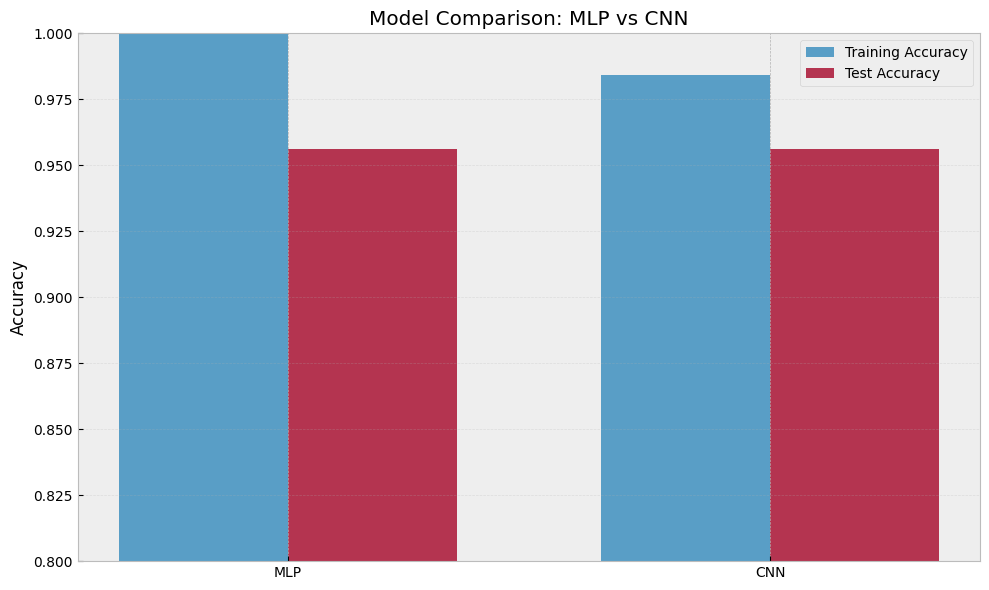

In [27]:
# Evaluate CNN and generate classification reports

# Make predictions
train_pred_cnn = (cnn_model.predict(X_train_cnn, verbose=0) > 0.5).astype(int).flatten()
test_pred_cnn = (cnn_model.predict(X_test_cnn, verbose=0) > 0.5).astype(int).flatten()

print("="*60)
print("CNN MODEL - CLASSIFICATION REPORTS")
print("="*60)

print("\nTraining Set:")
print(classification_report(t_train, train_pred_cnn, target_names=['Malignant (0)', 'Benign (1)']))

print("\nTest Set:")
print(classification_report(t_test, test_pred_cnn, target_names=['Malignant (0)', 'Benign (1)']))

# Calculate accuracies
train_acc_cnn = accuracy_score(t_train, train_pred_cnn)
test_acc_cnn = accuracy_score(t_test, test_pred_cnn)

print(f"\nTraining Accuracy: {train_acc_cnn:.4f}")
print(f"Test Accuracy: {test_acc_cnn:.4f}")

print("\n" + "="*60)
print("DISCUSSION")
print("="*60)
print("The CNN model performance on the breast cancer classification task:")
print("- CNNs can extract local patterns from the feature sequence")
print("- The convolutional layers learn hierarchical features")
print("- First conv layer captures local patterns among nearby features")
print("- Second conv layer combines these patterns into higher-level representations")
print("- Pooling layers reduce dimensionality and provide translation invariance")
print("\nCompared to the MLP:")
if test_acc_cnn > test_acc_mlp:
    print("- CNN achieves better test accuracy than MLP")
    print("- This suggests local feature patterns are informative for classification")
elif test_acc_cnn < test_acc_mlp:
    print("- MLP achieves better test accuracy than CNN")
    print("- For this dataset, global feature relationships may be more important")
    print("- The tabular nature of the data may not benefit from convolution")
else:
    print("- CNN and MLP achieve similar test accuracy")
    print("- Both architectures are effective for this task")

print("\nKey insight:")
print("CNNs are typically designed for data with spatial/temporal structure.")
print("For tabular data like this, MLPs may be more appropriate unless")
print("there is a meaningful ordering or local structure in the features.")

# Comparison visualization
fig, ax = plt.subplots(figsize=(10, 6))
models = ['MLP', 'CNN']
train_accs = [train_acc_mlp, train_acc_cnn]
test_accs = [test_acc_mlp, test_acc_cnn]

x = np.arange(len(models))
width = 0.35

ax.bar(x - width/2, train_accs, width, label='Training Accuracy', alpha=0.8)
ax.bar(x + width/2, test_accs, width, label='Test Accuracy', alpha=0.8)

ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison: MLP vs CNN')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0.8, 1.0])

plt.tight_layout()
plt.show()

---

# On-Time (4 points) + Notebook PDF (1 point)

Submit your Notebook PDF before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___